In [214]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [39]:
# Reading the csv file
df = pd.read_csv("NYC.csv")

In [44]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [46]:
# Droping irrelevant columns
df=df.drop(columns = ["Location Point1","PHONE", "BUILDING", "RECORD DATE"])
df.head(4)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40605319,42ND STREET PIZZA DINER,Manhattan,WEST 42 STREET,10036.0,American,07/22/2021,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,11.0,A,07/22/2021,Cycle Inspection / Initial Inspection,40.761533,-73.999996,104.0,3.0,12900.0,1027089.0,1.010900e+09,MN15
1,50034742,BLUJEEN,Manhattan,FREDERICK DOUGLASS BOULEVARD,NaN,American,02/23/2018,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,Administrative Miscellaneous / Re-inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
2,50131655,LIBERTY BAGELS,Manhattan,BROADWAY,10004.0,Bagels/Pretzels,02/17/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,21.0,NaN,NaN,Pre-permit (Non-operational) / Initial Inspection,40.706038,-74.013096,101.0,1.0,900.0,1078979.0,1.000220e+09,MN25
3,50070479,MIRAJ HEALTHY GRILL,Manhattan,EAST 34 STREET,10016.0,Mediterranean,04/13/2022,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,0.0,NaN,NaN,Cycle Inspection / Initial Inspection,40.746654,-73.980360,105.0,2.0,7200.0,1018513.0,1.008890e+09,MN20


In [49]:
# Getting rid of rows with null values
df_2 = df.dropna()


In [52]:
# Converting the INSPECTION DATE column into a datetime type
df_2["INSPECTION DATE"] = pd.to_datetime(df_2["INSPECTION DATE"])

C:\Users\arths\AppData\Local\Temp\ipykernel_26216\2646495744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["INSPECTION DATE"] = pd.to_datetime(df_2["INSPECTION DATE"])


In [53]:
# Getting rid of duplicate rows
df_2 = df_2.drop_duplicates()

In [54]:
# Standardizing string formatting
df_2["BORO"] = df_2["BORO"].str.strip().str.title()
df_2["CUISINE DESCRIPTION"] = df_2["CUISINE DESCRIPTION"].str.strip().str.title()
df_2["ACTION"] = df_2["ACTION"].str.strip().str.title()

In [68]:
# Showing Summary stats for the score, such as mean, min and max
print(df_2[["SCORE"]].describe())
print()
# Showing Summary stats for the grade, such as the most common grade and the most common grade’s frequency
print(df_2[["GRADE"]].describe())

               SCORE
count  125988.000000
mean       15.345858
std        11.783529
min         0.000000
25%        10.000000
50%        12.000000
75%        15.000000
max       154.000000

         GRADE
count   125988
unique       6
top          A
freq     92280


In [73]:
# Showing the mean, min and max scores
df_2[["SCORE"]].describe().T[["count", "mean","min","max"]].T

,SCORE
count,125988.000000
mean,15.345858
min,0.000000
max,154.000000


In [89]:
# Showing the mean score of each grade for each cuisine
df_2[["SCORE","GRADE","CUISINE DESCRIPTION"]].groupby(["CUISINE DESCRIPTION","GRADE"]).mean()

SCORE
CUISINE DESCRIPTION GRADE           
Afghan              A      10.232143
                    B      23.000000
African             A      10.523148
                    B      22.858696
                    C      38.657895
...                              ...
Vegetarian          A       9.741036
                    B      23.000000
                    C      38.470588
                    P       6.000000
                    Z      10.000000

[351 rows x 1 columns]

In [91]:
# Showing the number each grade for each cuisine got
df_2[["SCORE","GRADE","CUISINE DESCRIPTION"]].groupby(["CUISINE DESCRIPTION","GRADE"]).count()

SCORE
CUISINE DESCRIPTION GRADE       
Afghan              A         56
                    B          9
African             A        216
                    B         92
                    C        114
...                          ...
Vegetarian          A        251
                    B         28
                    C         17
                    P          3
                    Z          3

[351 rows x 1 columns]

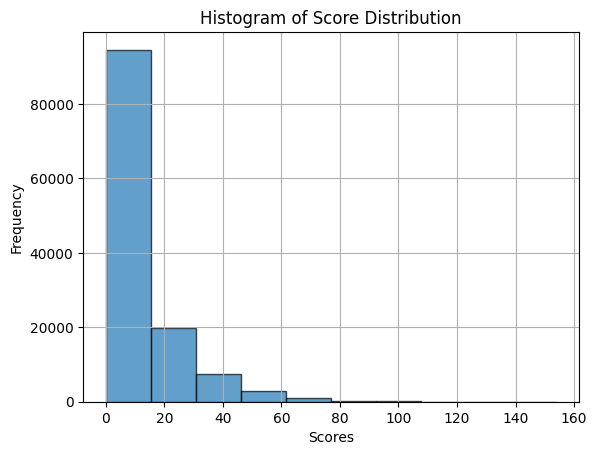

In [94]:
# The distribution of the score
plt.hist(df_2[["SCORE"]], edgecolor='black', alpha=0.7)
plt.title('Histogram of Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

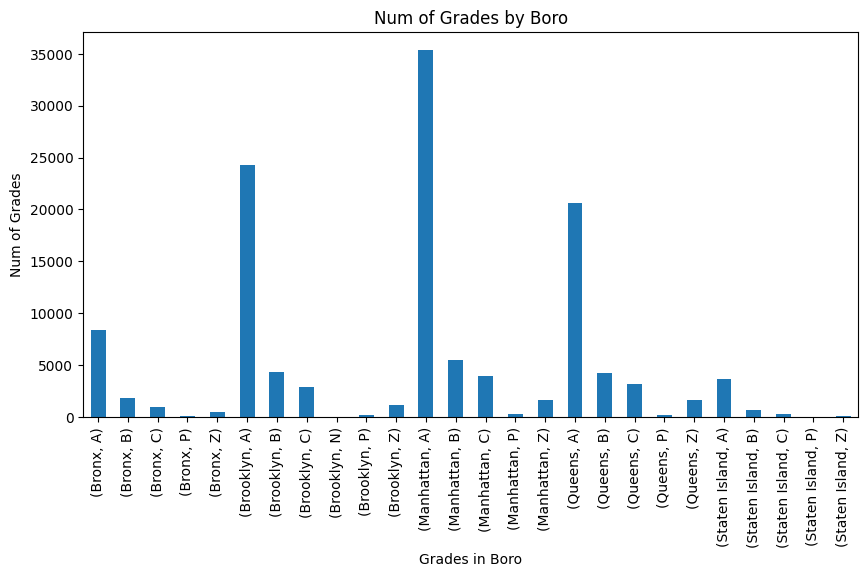

In [127]:
# This plot shows the number each grade got in each borough
df_2.groupby(["BORO","GRADE"]).count()[["ZIPCODE"]].plot(kind='bar',figsize=(10,5),legend = False)
plt.title('Num of Grades by Boro')
plt.xlabel('Grades in Boro')
plt.ylabel('Num of Grades')
plt.show()

In [139]:
df_vis = df_2[["CUISINE DESCRIPTION","VIOLATION CODE"]].groupby("CUISINE DESCRIPTION").count().sort_values(by=['VIOLATION CODE'],ascending = False)[:10]

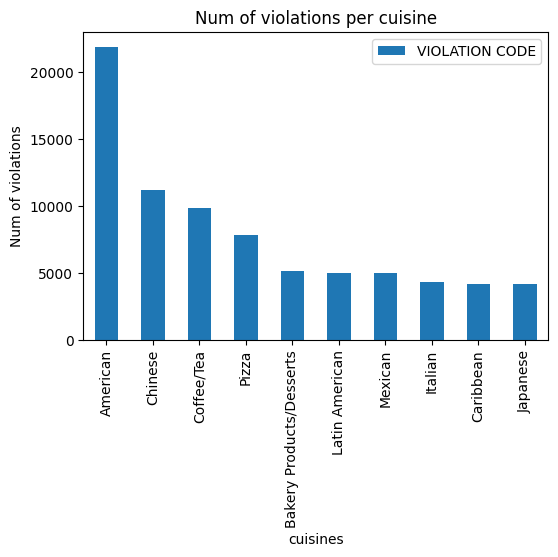

In [144]:
# This plot shows the 10 cuisines with the most violations
df_vis.plot(kind="bar",figsize=(6,4))
plt.title('Num of violations per cuisine')
plt.xlabel('cuisines')
plt.ylabel('Num of violations')
plt.show()

In [145]:
def score_to_grade(score):
    if pd.isnull(score):
        return "Unknown"
    elif score <= 13:
        return "A"
    elif score <=27:
        return "B"
    else:
        return "C"

In [146]:
# Creating a feature in the dataframe that categorizes the scores based on thresholds
df_2["score_category "] = df_2["SCORE"].apply(score_to_grade)

In [167]:
# number of unqiue violations each restaurant got
df_2[["CAMIS","VIOLATION CODE"]].groupby("CAMIS").nunique()

,VIOLATION CODE
CAMIS,
30075445,6
30191841,3
40356018,1
40356483,8
40356731,7
...,...
50169803,2
50170013,2
50170339,2


In [200]:
# A feature which shows whether a restaurant got multiple inspections
x = df_2[["CAMIS","INSPECTION DATE"]].groupby("CAMIS").count()>1
x

,INSPECTION DATE
CAMIS,
30075445,True
30191841,True
40356018,False
40356483,True
40356731,True
...,...
50169803,True
50170013,True
50170339,True


C:\Users\arths\AppData\Local\Temp\ipykernel_26216\870022583.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


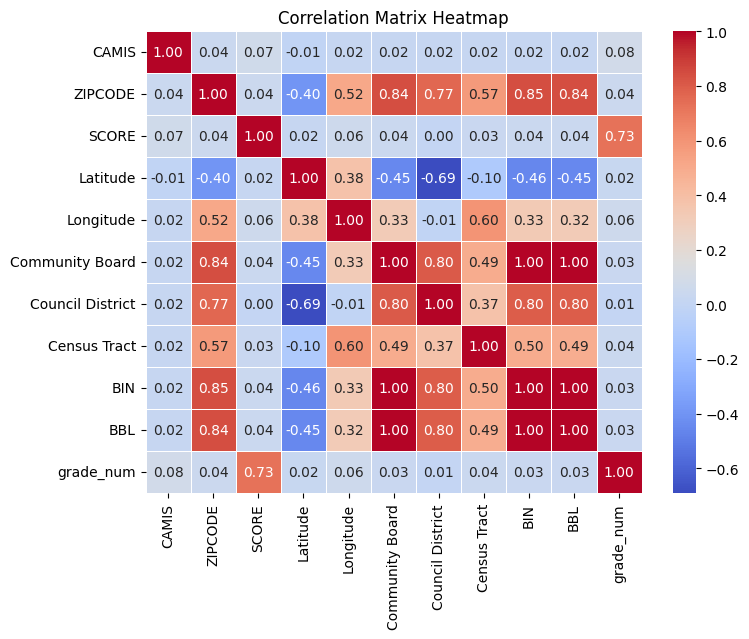

In [217]:
# Factorizing the Grade column to include in the correlation matrix
df_2["grade_num"] = df_2[["GRADE"]].apply(lambda x: pd.factorize(x)[0])
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()